[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/aimlds1_08-UnsupervisedLearning/blob/master/F08_SC1-Clustering_Sprint_Challenge.ipynb)

# Clustering Sprint Challenge

Objectives:
* Describe two clustering algorithms
* Create k clusters with k-Means algorithm
* Compare/contrast the performance of your two algorithms with two datasets

### 1. Describe two different clustering algorithms

There are many clustering algorithms with profoundly different implementations. Their objective is the same - to identify groups in unlabeled data.

Fill out the below python objects.

In [66]:
#!diff clustering_set1.csv clustering_set2.csv
#!echo '   '
#!rm clustering_set1.csv clustering_set2.csv
#!wget -c https://www.dropbox.com/s/zakq7e0r8n1tob9/clustering_set1.csv?raw=1 && mv clustering_set1.csv?raw=1 clustering_set1.csv && ls -lh clustering_set1.csv && date
#!wget -c https://www.dropbox.com/s/zakq7e0r8n1tob9/clustering_set2.csv?raw=1 && mv clustering_set2.csv?raw=1 clustering_set2.csv && ls -lh clustering_set2.csv && date
#!ls -lh clustering_set?.csv
!diff clustering_set1.csv clustering_set2.csv

In [67]:
!echo "clustering_set1.csv clustering_set2.csv are the same dataset"

clustering_set1.csv clustering_set2.csv are the same dataset


In [41]:
# Clustering algorithm 1:

algorithm_one_name = "Expectation Maximization Clustering using Gaussian Mixture Models"
algorithm_one_description = '''
In constrast to the circular clustering we get with K-Means
Gaussian Mixture Models use a combination of standard deviation and Mean
because the mean and standard deviation can be mixed the cluster's shapes can
vary from circular to oval
'''

# Clustering algorithm 2:

algorithm_two_name = "Density-Based Spatial Clustering of Applications with Noise [DBSCAN] "
algorithm_two_description = '''
This algorithm uses a threshold e to determine the proximity of samples to each other. If there are a sufficient 
amount of points within a certain area the clustering commences. This allows for an arbirtrary amount of clusters 
and shapes but the algorithm can have difficulty if the  cluster vary sufficiently in density.
'''

### 2. Create k clusters with k-Means algorithm

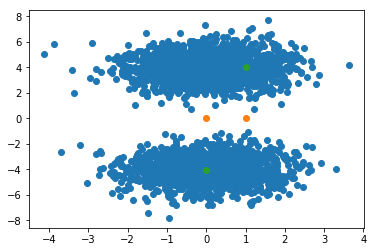

In [96]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Dataset
set1 = pd.read_csv('clustering_set1.csv')

X1 = set1[['x','y']].values

# Create kmeans object
#this_many_classes = np.unique(set1.targets).shape[0]
km = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=1)

# Fit kmeans object to data
km.fit(X1)

# Print location of clusters learned by kmeans object
km.cluster_centers_ # Why does this have 3 coordinates? Is it a 3 dimensional cluster?
plt.plot(X1.T[0],X1.T[1], 'o');
plt.plot(km.cluster_centers_, 'o')
plt.show()

In [92]:
X1.T[0]

array([ 0.64910455, -0.25797422,  0.05403485, ...,  0.55177136,
        0.77550437,  0.96943119])

### 3. Compare/contrast the performance of your two algorithms with two datasets

In [43]:
# Second dataset
set2 = pd.read_csv('clustering_set2.csv')
X2 = set2[['x','y']].values

In [68]:
from sklearn import cluster, mixture

EMcGMM1 = mixture.GaussianMixture(n_components=1, covariance_type='full')
EMcGMM2 = mixture.GaussianMixture(n_components=1, covariance_type='full')
DBSCAN1 = cluster.DBSCAN(eps=0.3, min_samples=10)
DBSCAN2 = cluster.DBSCAN(eps=0.3, min_samples=10)

In [69]:
%%time
EMcGMM1.fit(X1)
EMcGMM2.fit(X2)
DBSCAN1.fit(X1)
DBSCAN2.fit(X2)

CPU times: user 110 ms, sys: 5.67 ms, total: 115 ms
Wall time: 168 ms


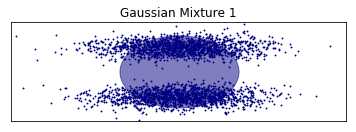

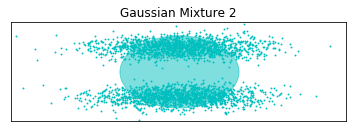

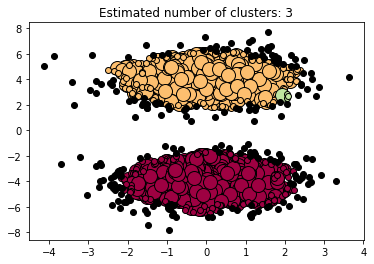

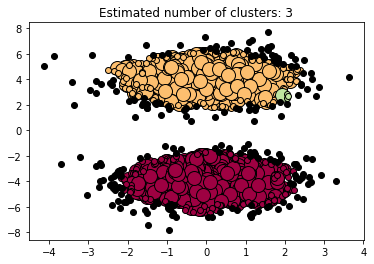

In [97]:
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl


color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])


def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-4., 4.)
    plt.ylim(-8., 8.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)



def plot_DBSCAN(db):
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()






plot_results(X1, EMcGMM1.predict(X1), EMcGMM1.means_, EMcGMM1.covariances_, 1,
             'Gaussian Mixture 1')
plt.show()

plot_results(X2, EMcGMM2.predict(X2), EMcGMM2.means_, EMcGMM2.covariances_, 1,
             'Gaussian Mixture 2')
plt.show()


plot_DBSCAN(DBSCAN1)
plot_DBSCAN(DBSCAN2)



In [98]:
#dir(EMcGMM1)

In [56]:
!git status && date


On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   .ipynb_checkpoints/F08_SC1-DJ--Clustering_Sprint_Challenge-checkpoint.ipynb
	modified:   F08_SC1-DJ--Clustering_Sprint_Challenge.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
Sun Jun  3 15:36:39 EDT 2018


In [57]:
!git add . && git commit -am "I got the Gaussian Mixtures to plot but they look exactly the same :( Are they actually the same data set?" && git status && git push && date && git status && date

[master 1c6a34e] I got the Gaussian Mixtures to plot but they look exactly the same :( Are they actually the same data set?
 2 files changed, 1064 insertions(+), 296 deletions(-)
 rewrite .ipynb_checkpoints/F08_SC1-DJ--Clustering_Sprint_Challenge-checkpoint.ipynb (96%)
 rewrite F08_SC1-DJ--Clustering_Sprint_Challenge.ipynb (96%)
On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean
Counting objects: 4, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 34.97 KiB | 5.83 MiB/s, done.
Total 4 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:schwaaweb/aimlds1_08-UnsupervisedLearning.git
   38f0303..1c6a34e  master -> master
Sun Jun  3 15:36:47 EDT 2018
On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean
Sun Ju